In [1]:
%reload_ext autoreload
%autoreload 2

In [14]:
import utils as u
import importlib
importlib.reload(u)
from fink_fat_notebook.parameters_selection.exploring_script import plot_hist_and_cdf
import io
import requests
import os
import pandas as pd
import numpy as np
from astropy.time import Time
from collections import Counter
from IPython.display import display, Markdown, Latex

import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
r_orb = requests.post(
  'https://fink-portal.org/api/v1/ssocand',
  json={
    'kind': 'orbParams', # Mandatory, `orbParams` or `lightcurves`
  }
)
r_tra = requests.post(
  'https://fink-portal.org/api/v1/ssocand',
  json={
    'kind': 'lightcurves', # Mandatory, `orbParams` or `lightcurves`
  }
)

# Format output in a DataFrame
candid_reconstr_orbit = pd.read_json(io.BytesIO(r_orb.content))
candid_reconstr_traje = pd.read_json(io.BytesIO(r_tra.content))


In [19]:
candid_reconstr_orbit

,d:a,d:arg_peric,d:chi_reduced,d:e,d:i,d:long_node,d:mean_anomaly,d:ref_epoch,d:rms_a,d:rms_arg_peric,d:rms_e,d:rms_i,d:rms_long_node,d:rms_mean_anomaly,d:ssoCandId
0,8.876244,265.001565,0.950000,0.559389,1.934036,91.325922,10.610958,2.460253e+06,1.040960,3.896930,0.072021,0.068450,2.020710,2.270480,FF04112023aaaacti
1,13.516634,112.315698,-1.000000,0.646187,10.007624,207.986038,7.123208,2.460197e+06,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,FF09092023aaaactc
2,9.124433,0.373788,1.048333,0.432497,1.909824,94.671843,289.718610,2.460234e+06,20.039200,186.510000,1.582930,0.206581,9.459010,440.092000,FF16102023aaaactf
3,34.872544,98.709332,-1.000000,0.949610,7.475873,50.101567,357.832291,2.460208e+06,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,FF20092023aaaactd
4,2.605905,156.855048,2.571429,0.348782,10.946437,44.521540,3.395080,2.460058e+06,0.041450,0.835243,0.005279,0.224460,0.198487,0.357818,FF2023aaaaaaa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1850,3.257885,56.855087,32.768333,0.274122,15.440399,273.196304,19.241595,2.460169e+06,0.479430,2.305320,0.096842,0.122836,2.341170,5.275650,FF2023aaaacta
1851,9.875010,151.579272,-1.000000,0.903645,0.744524,178.668622,1.571952,2.460239e+06,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,FF21102023aaaactg
1852,4.664265,141.585135,1.180000,0.406247,1.049503,36.352962,256.853280,2.460242e+06,0.905759,14.415000,0.941299,1.031960,0.972960,131.694000,FF24102023aaaacth
1853,4.820129,115.820384,0.848750,0.244321,1.137556,35.690486,269.970155,2.460214e+06,0.239134,8.058060,0.224767,0.140292,0.056368,36.014600,FF26092023aaaacte


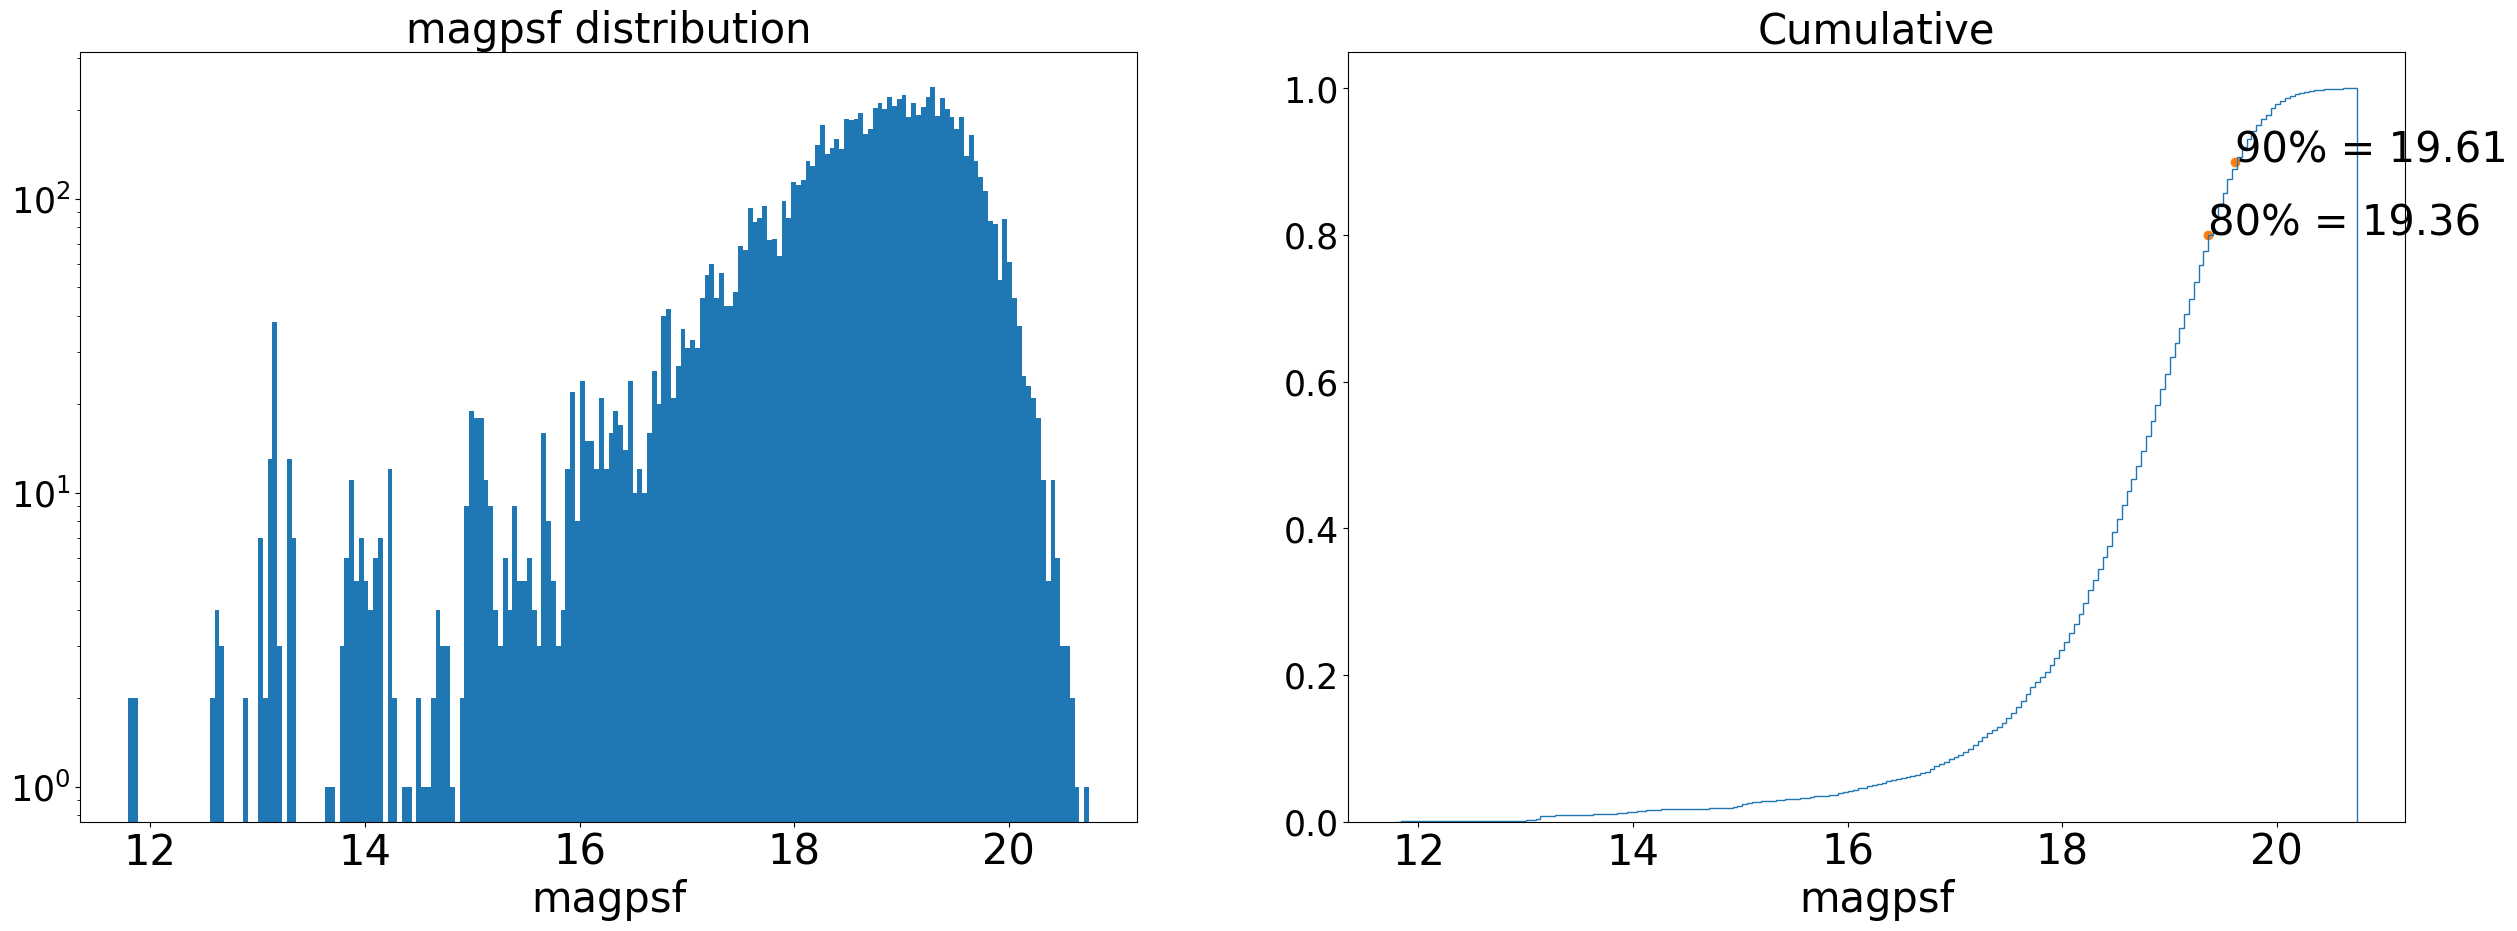

In [18]:
plot_hist_and_cdf(candid_reconstr_traje["d:magpsf"], None, "magpsf distribution", "magpsf", "", None, "Cumulative", "magpsf", "")

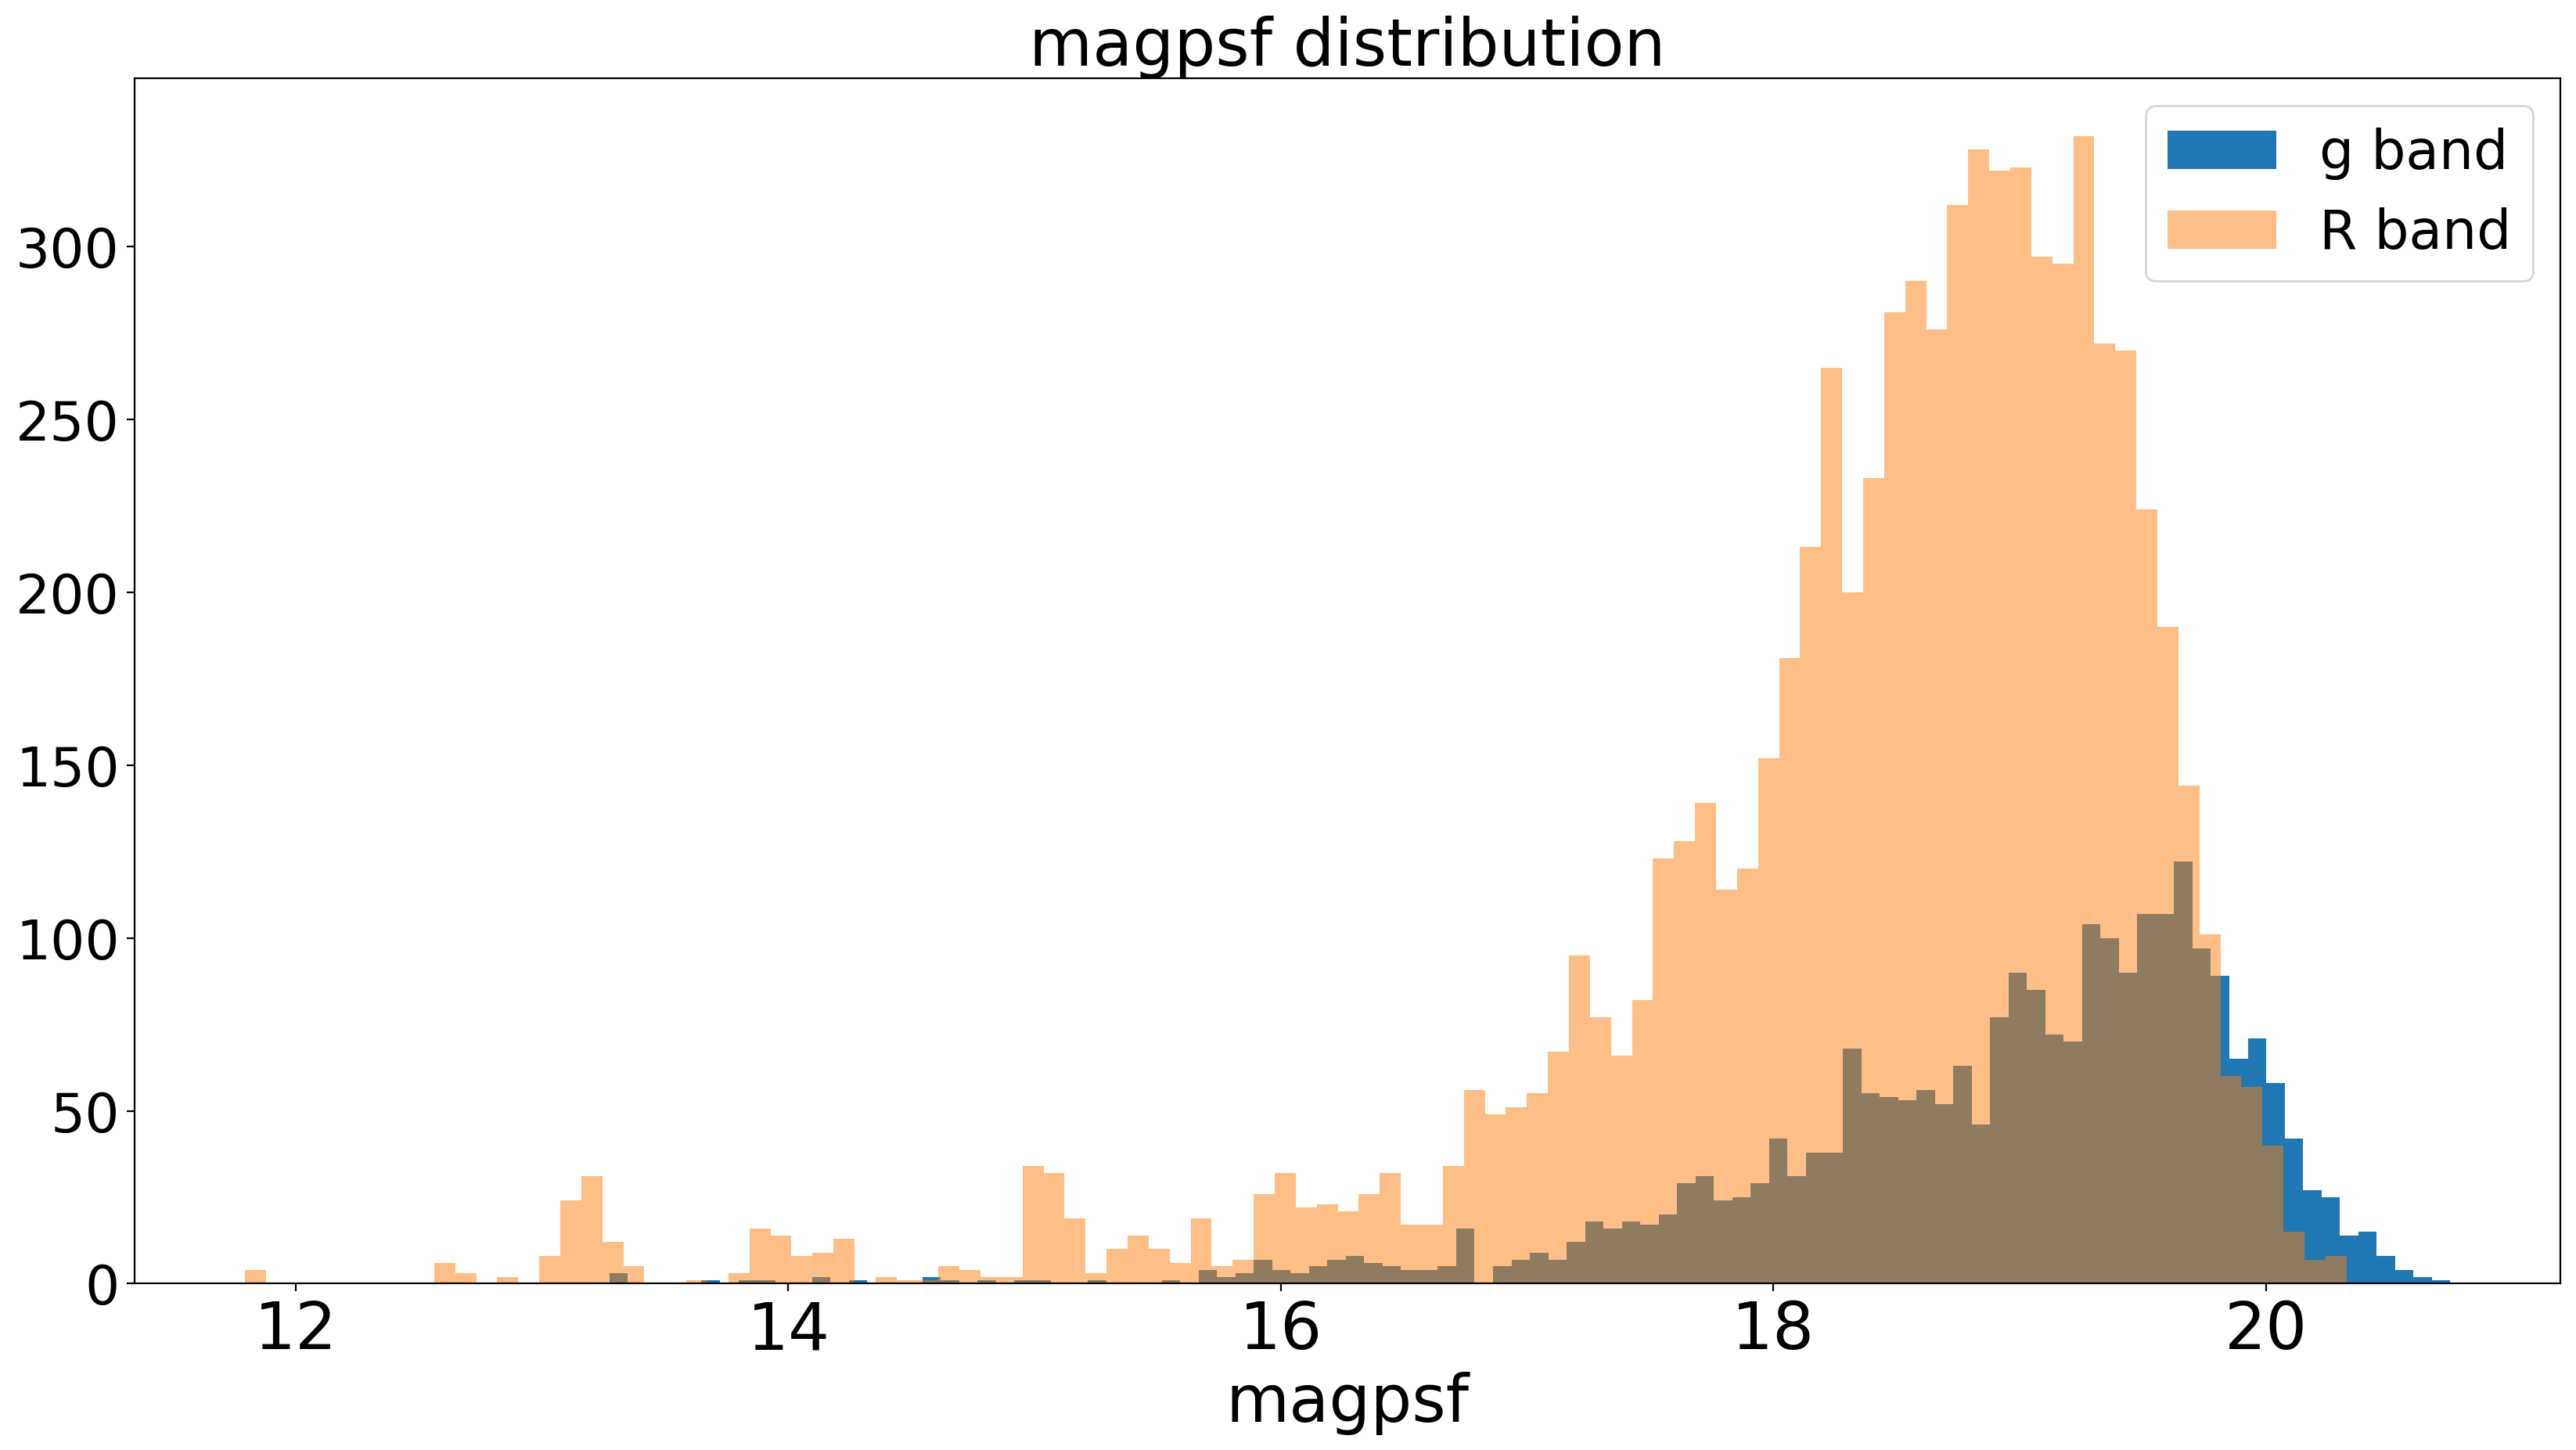

In [38]:
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["figure.dpi"] = 200
_, ax1 = plt.subplots(1, 1, figsize=(20, 10))
ax1.set_title("magpsf distribution", fontdict={"size": 30})
ax1.set_xlabel("magpsf", fontdict={"size": 30})
ax1.set_ylabel("", fontdict={"size": 30})
# ax1.set_yscale("log")
ax1.hist(
    candid_reconstr_traje[candid_reconstr_traje["d:fid"] == 1]["d:magpsf"],
    bins=100,
    label="g band"
)
ax1.hist(
    candid_reconstr_traje[candid_reconstr_traje["d:fid"] == 2]["d:magpsf"],
    bins=100,
    alpha=0.5,
    label="R band"
)
ax1.tick_params(axis="x", which="major", labelsize=30)
ax1.tick_params(axis="y", which="major", labelsize=25)
ax1.legend(prop={"size": 25})
plt.show()

## Results

In [4]:
Markdown("""
|                     | Fink_FAT |                 |
|---------------------|----------|-----------------|
|                     | All      | Only with error |
| Reconstructed orbit | {:,}     | {:,} ({:.2f} %) |
| linked alerts       | {:,}     |                 |""".format(
    len(candid_reconstr_orbit), 
    len(candid_reconstr_orbit[candid_reconstr_orbit["d:rms_a"] != -1.0]),
    (len(candid_reconstr_orbit[candid_reconstr_orbit["d:rms_a"] != -1.0]) / len(candid_reconstr_orbit)) * 100,
    len(candid_reconstr_traje)
))


|                     | Fink_FAT |                 |
|---------------------|----------|-----------------|
|                     | All      | Only with error |
| Reconstructed orbit | 1,855     | 818 (44.10 %) |
| linked alerts       | 10,000     |                 |

##### Number of detection

In [5]:
res_gb = candid_reconstr_traje.groupby("d:ssoCandId").agg(nb_det=("d:ra", len)).sort_values("nb_det")
Markdown("""
| |number of detection|
|-|-------------------|
|min| {:,}            |
|median|{:,}          |
|max|{:,}             |
""".format(res_gb.min().values[0], int(res_gb.median().values[0]), res_gb.max().values[0]))


| |number of detection|
|-|-------------------|
|min| 1            |
|median|6          |
|max|10             |


In [6]:
for k, v in Counter(res_gb["nb_det"]).items():
    print("nb det: {}, nb traj = {} ({:0.2f}%)".format(k, v, (v/len(res_gb))*100))

nb det: 1, nb traj = 4 (0.22%)
nb det: 2, nb traj = 85 (4.69%)
nb det: 3, nb traj = 144 (7.94%)
nb det: 4, nb traj = 229 (12.62%)
nb det: 5, nb traj = 247 (13.62%)
nb det: 6, nb traj = 721 (39.75%)
nb det: 7, nb traj = 234 (12.90%)
nb det: 8, nb traj = 91 (5.02%)
nb det: 9, nb traj = 39 (2.15%)
nb det: 10, nb traj = 20 (1.10%)


##### Observation window

In [7]:
res_gb_obs_tw = candid_reconstr_traje.sort_values("d:jd").groupby("d:ssoCandId").agg(obs_win=("d:jd", lambda x: list(x)[-1] - list(x)[0])).sort_values("obs_win")
Markdown("""
| |Observation window (days)|
|-|-------------------|
|min| {:0.3f}            |
|median|{:0.3f}          |
|max|{:0.3f}             |
""".format(res_gb_obs_tw.min().values[0], int(res_gb_obs_tw.median().values[0]), res_gb_obs_tw.max().values[0]))


| |Observation window (days)|
|-|-------------------|
|min| 0.000            |
|median|7.000          |
|max|32.868             |


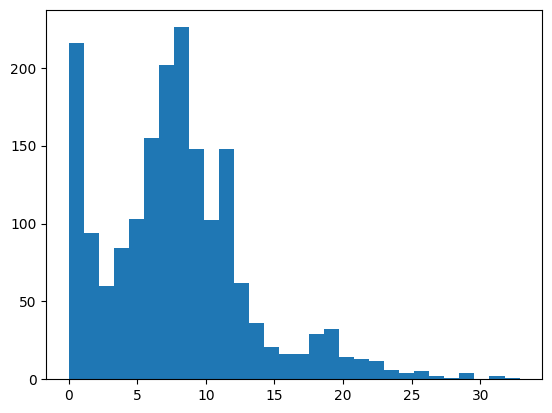

In [8]:
plt.hist(res_gb_obs_tw["obs_win"], bins=30)
plt.show()

In [9]:
obstw_and_orb = candid_reconstr_orbit.merge(res_gb_obs_tw.reset_index(), on="d:ssoCandId")
u.plot_hist_and_cdf(
    obstw_and_orb[obstw_and_orb["d:rms_a"] == -1.0]["obs_win"], 
    None, "observational time window of the orbit without error", "observational time window (days)", "", 
    None, "Cumulative", "observational time window (days)", "")

TypeError: plot_hist_and_cdf() takes from 2 to 4 positional arguments but 9 were given

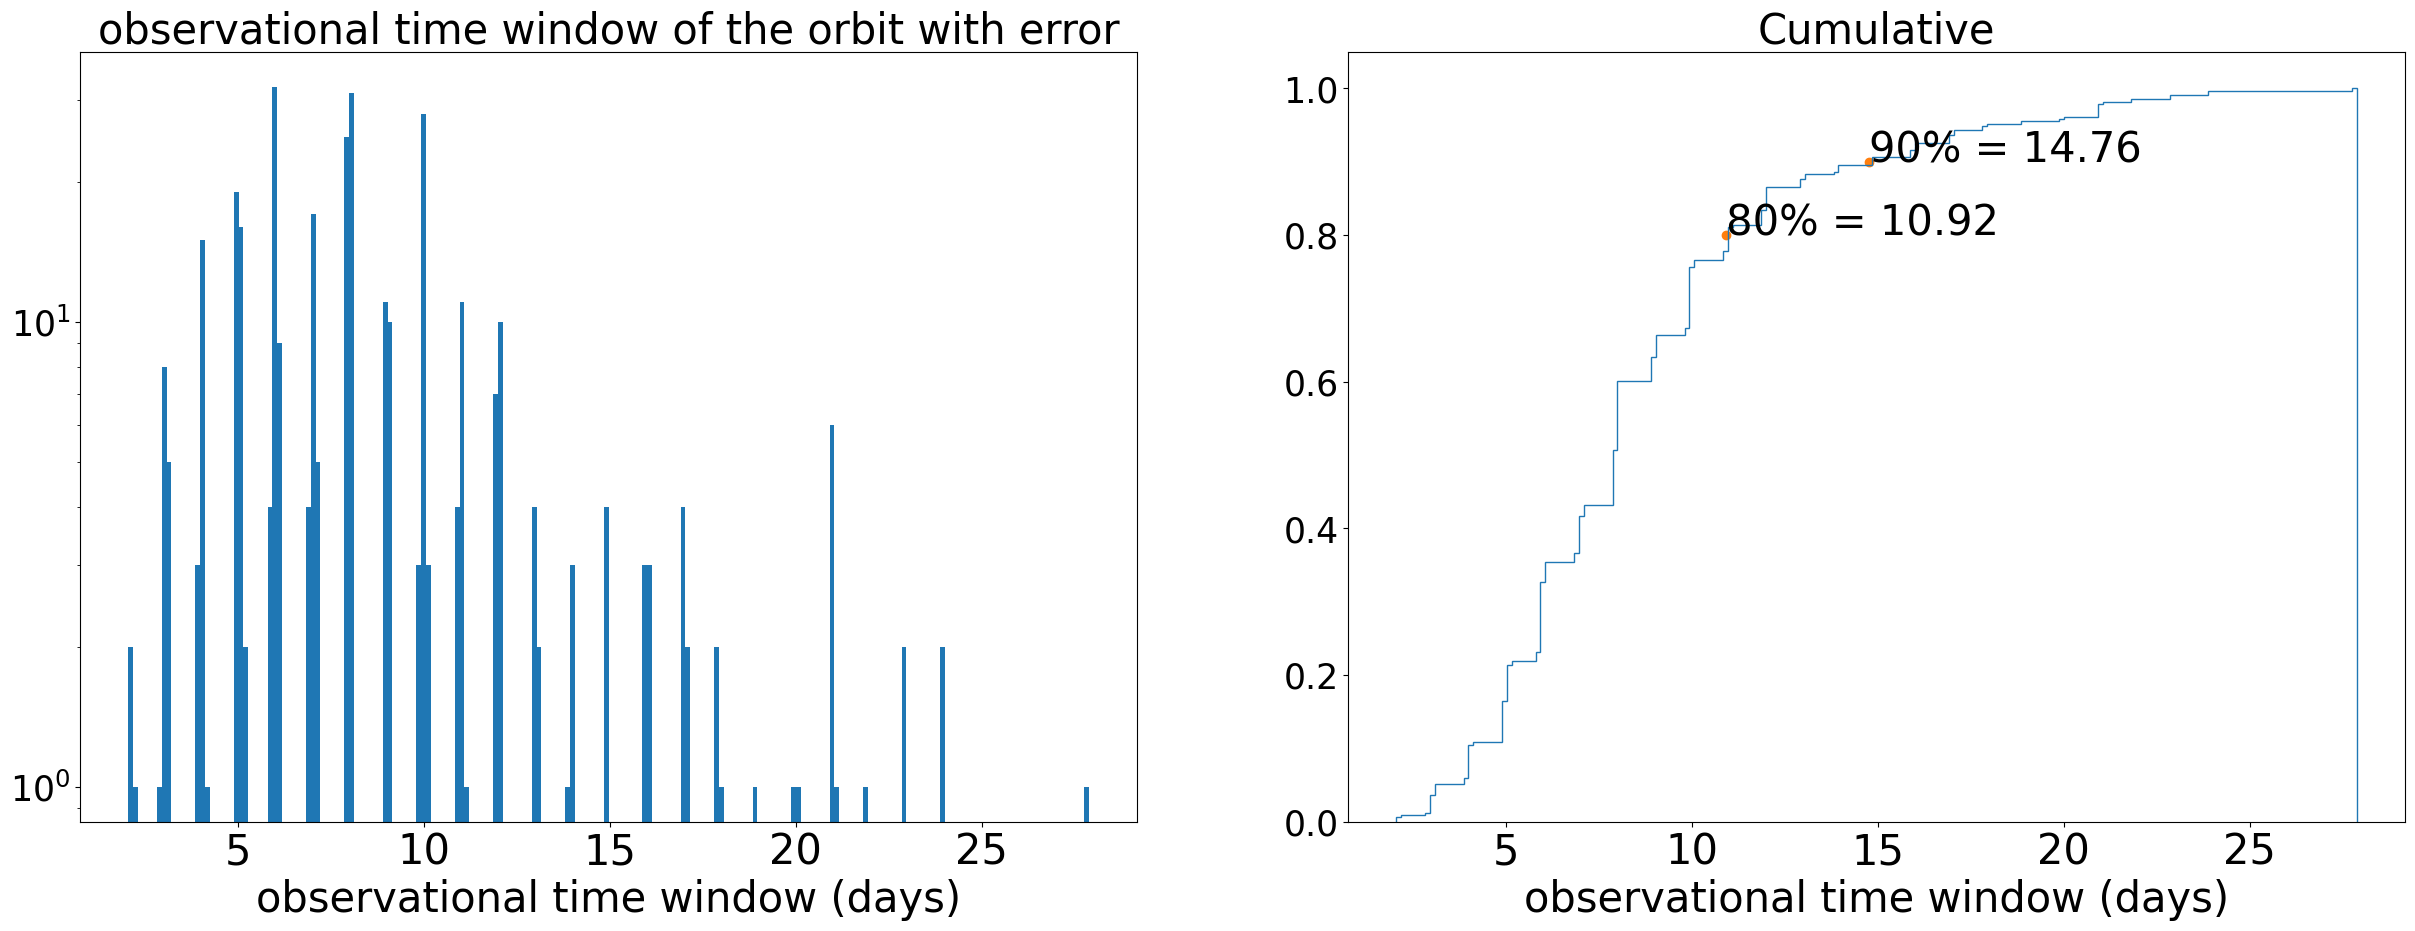

In [ ]:
u.plot_hist_and_cdf(
    obstw_and_orb[obstw_and_orb["d:rms_a"] != -1.0]["obs_win"], 
    None, "observational time window of the orbit with error", "observational time window (days)", "", 
    None, "Cumulative", "observational time window (days)", "")

### Magnitude

In [10]:
u.plot_hist_and_cdf(candid_reconstr_traje["d:magpsf"], None, "magpsf distribution", "magpsf", "", None, "Cumulative", "magpsf", "")

TypeError: plot_hist_and_cdf() takes from 2 to 4 positional arguments but 9 were given

### RMS compared to confirmed reconstruction

In [11]:
from collections import Counter
path_tw_exp = "../fink_fat_experiments/time_window_experiments/15_2_2/all_assoc/confirmed_all_fink_fat/mpc"
reconstructed_orbit = pd.read_parquet(os.path.join(path_tw_exp, "orbital.parquet"))
reconstructed_trajectory = pd.read_parquet(os.path.join(path_tw_exp, "trajectory_orb.parquet"))

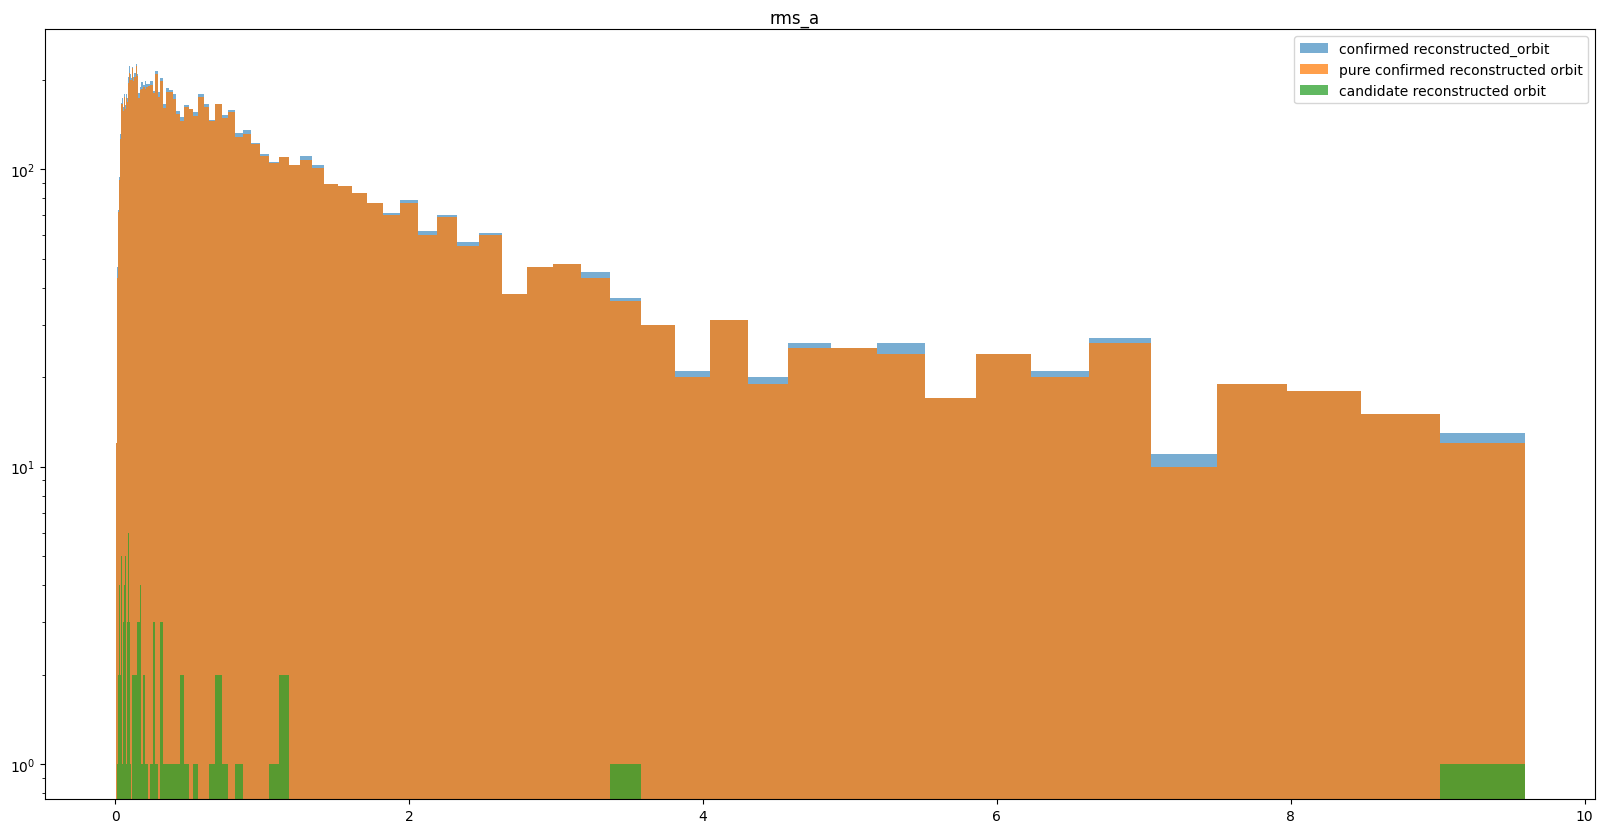

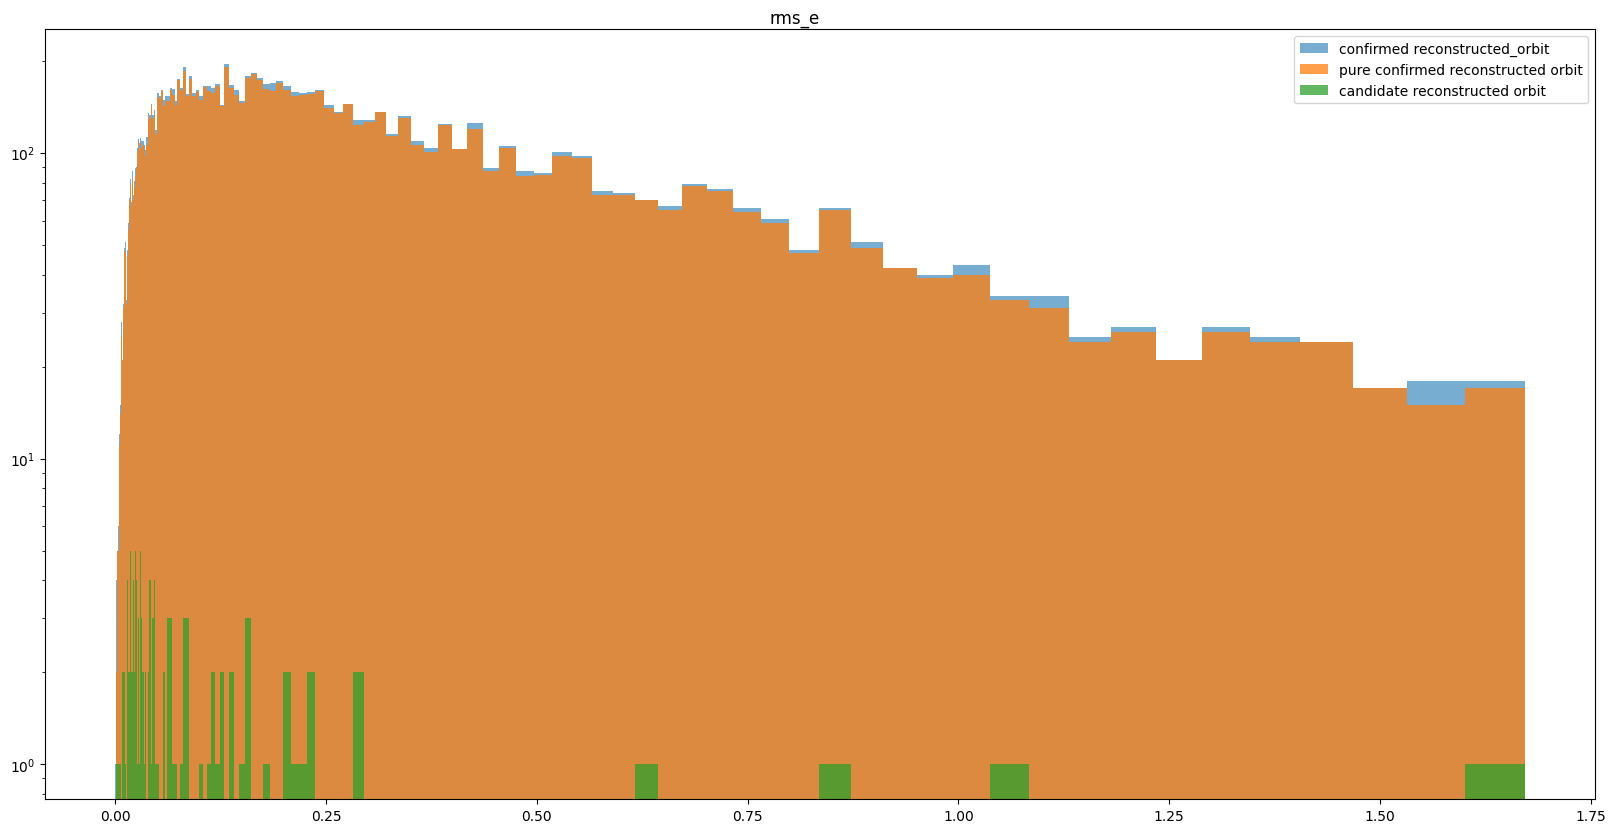

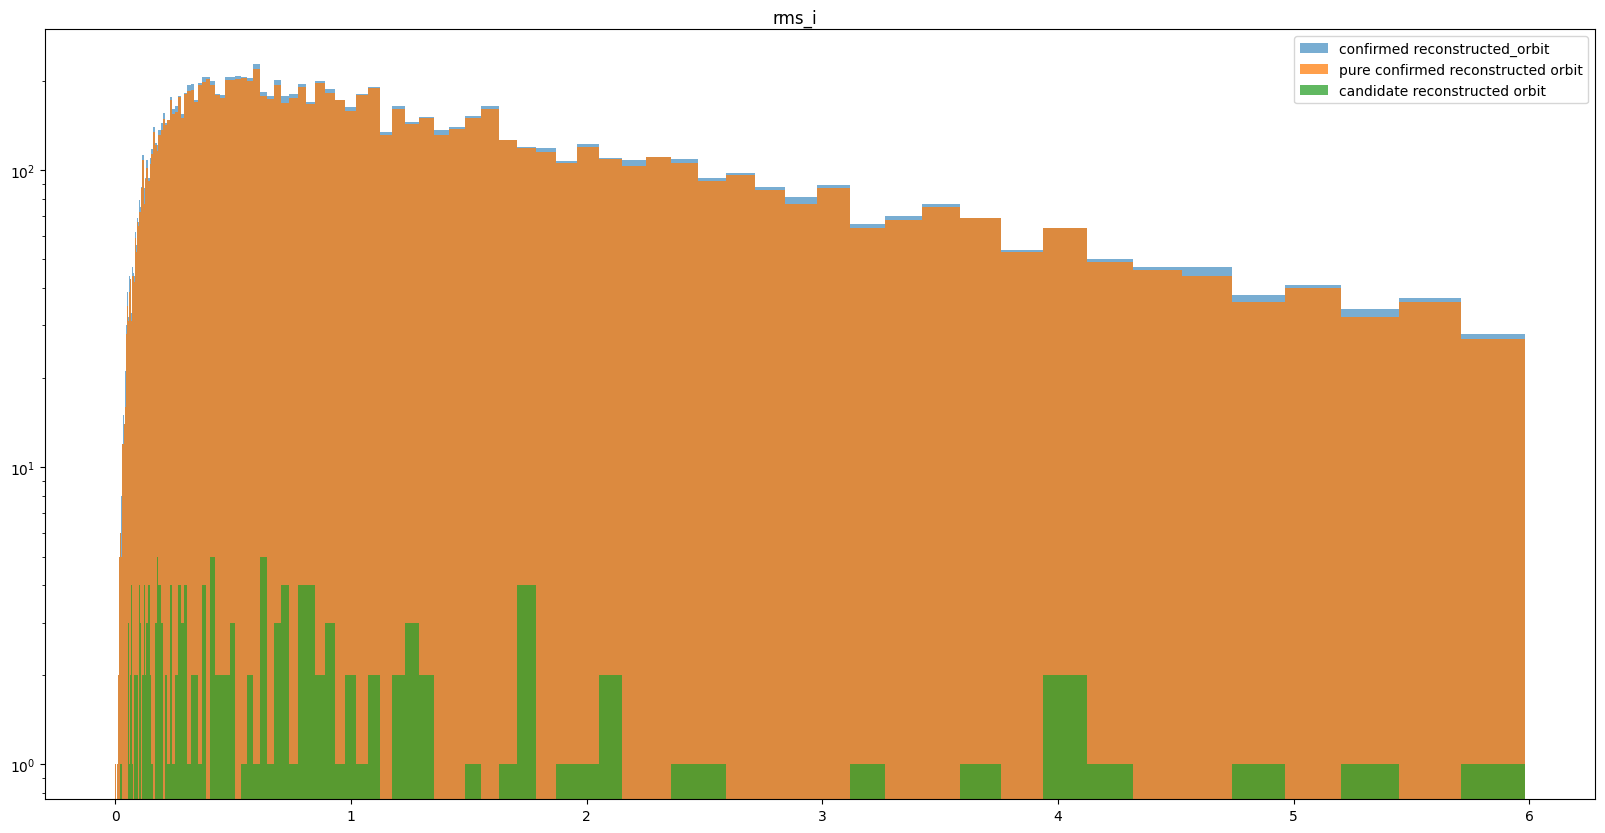

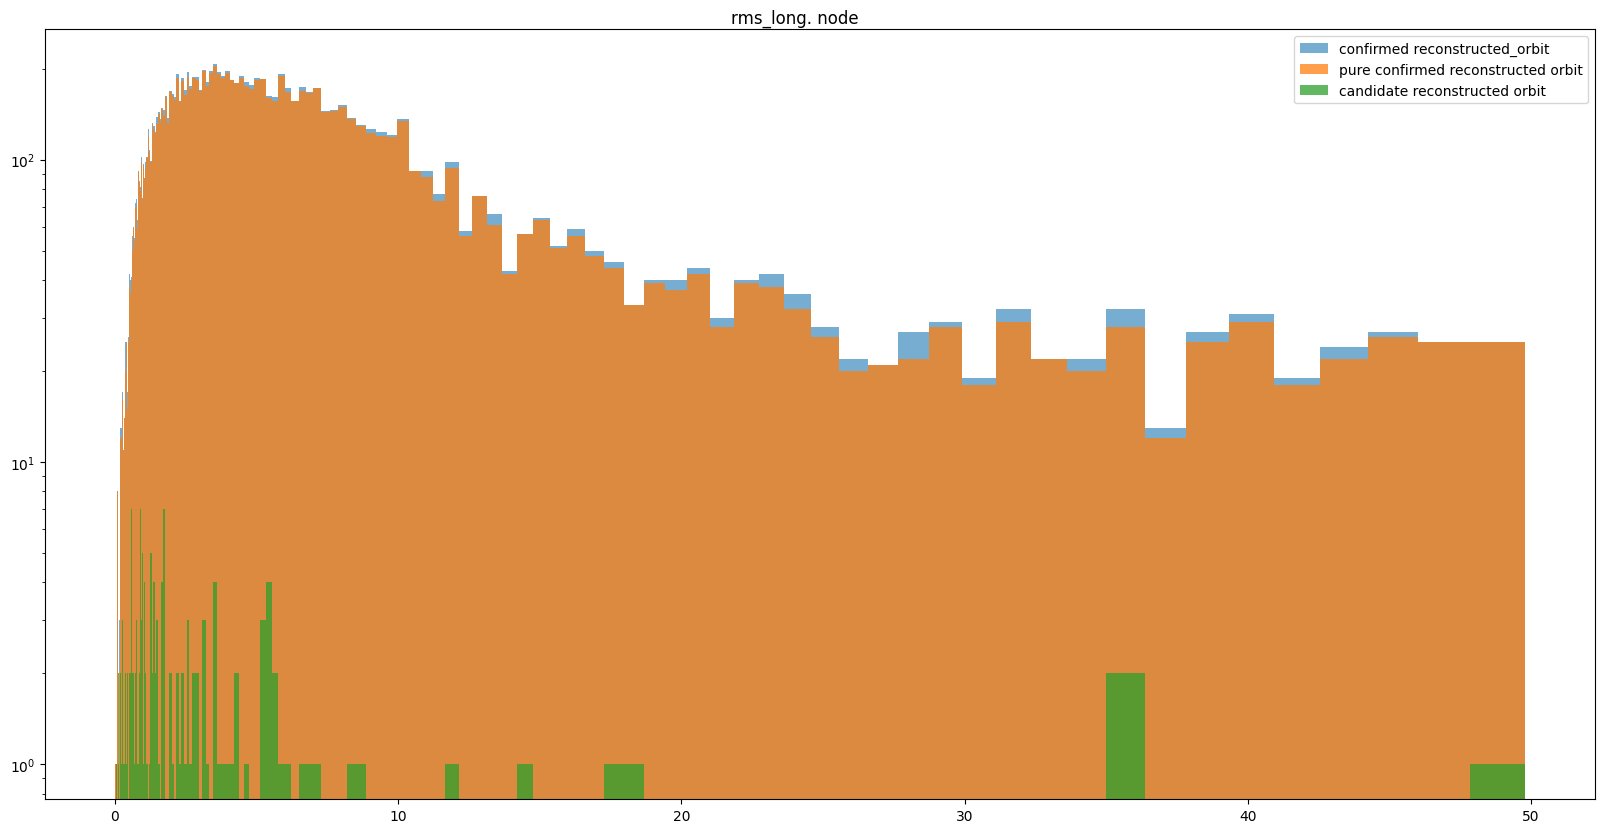

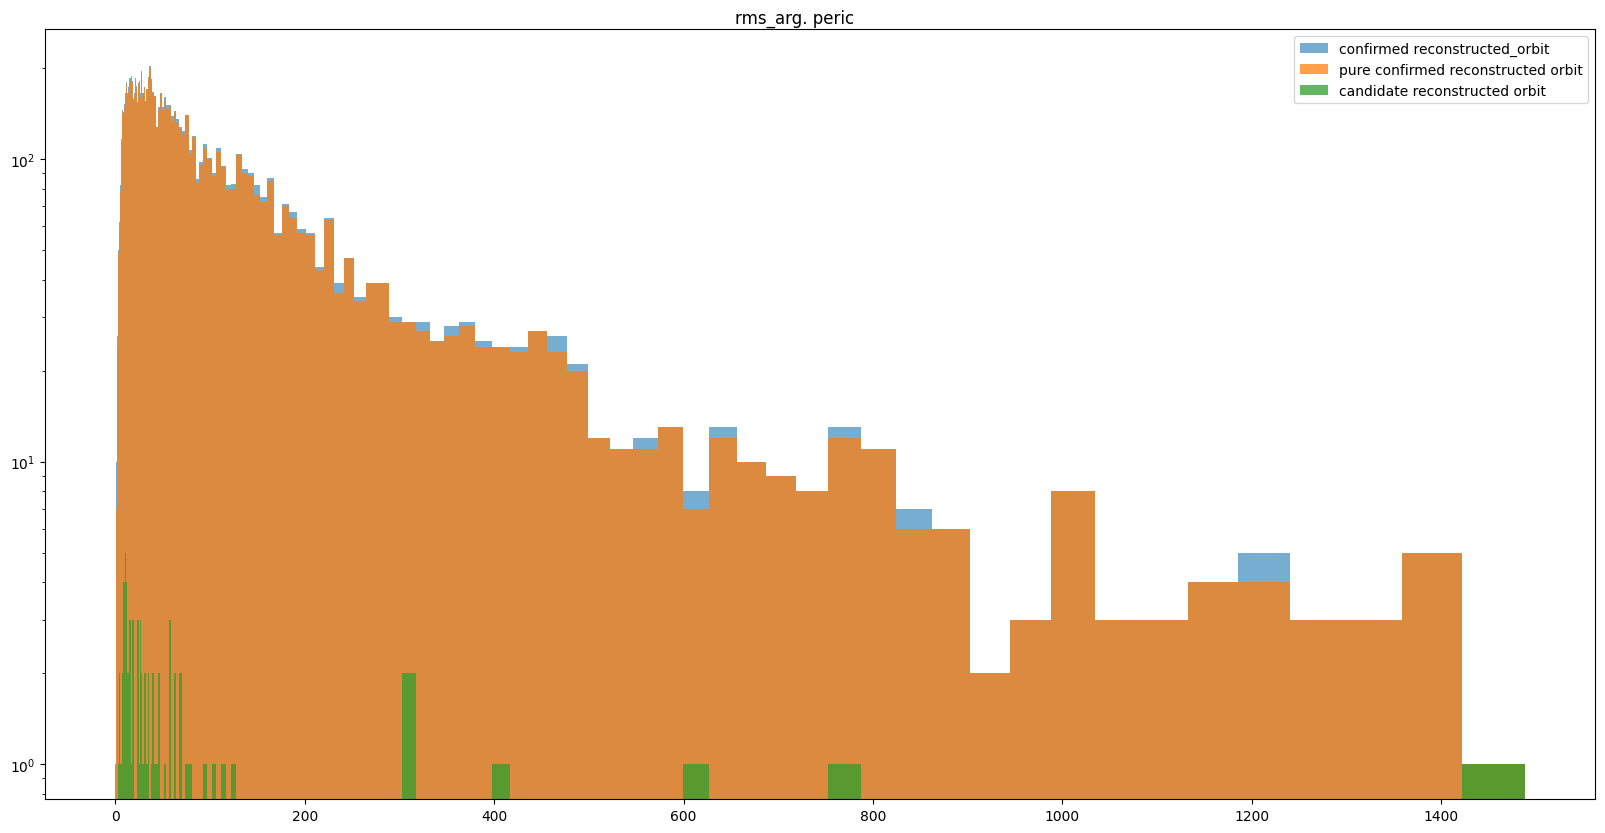

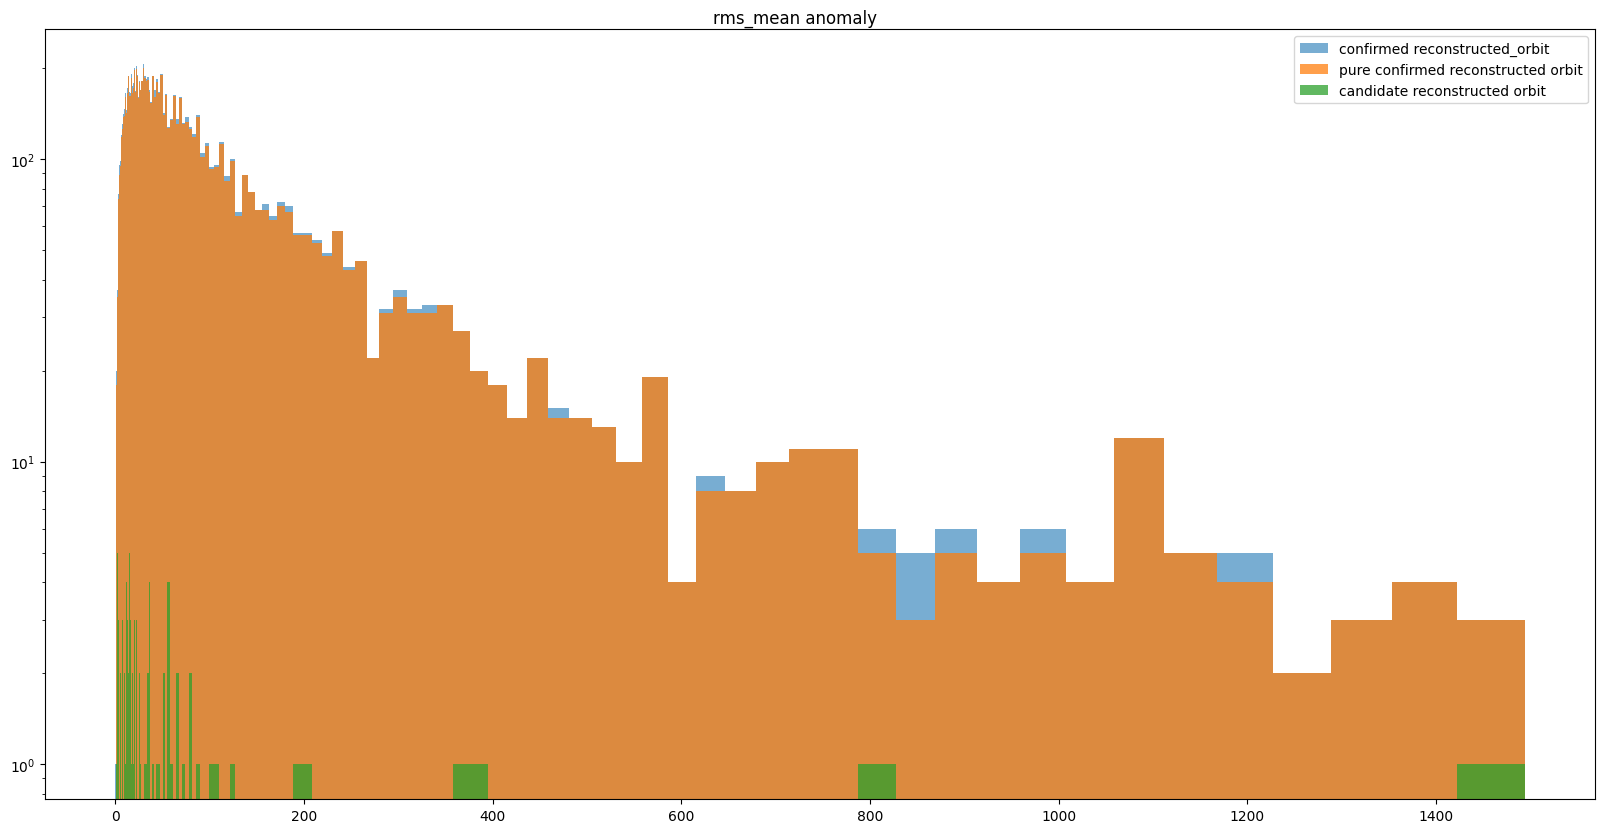

In [12]:
u.compare_confirmed_and_candidates_rms(
    reconstructed_orbit, 
    reconstructed_trajectory, 
    candid_reconstr_orbit[candid_reconstr_orbit["d:rms_a"] != -1.0]
)

#### SkyBot association

### Comparison with the experiences on the confirmed objets

In [25]:
orbits_candidates_during_confirmed_expe = candid_reconstr_orbit[
    (candid_reconstr_orbit["d:ref_epoch"] >= Time("2020-09-01", format="iso").jd) & 
    (candid_reconstr_orbit["d:ref_epoch"] <= Time("2020-10-01", format="iso").jd)
]

In [36]:
print("""
Orbits candidates during the experiences with confirmed objets

* nb_orbits: {}
    with error: {} ({:.2f} %)
    without error: {} ({:.2f} %)


""".format(
    len(orbits_candidates_during_confirmed_expe),
    len(orbits_candidates_during_confirmed_expe[orbits_candidates_during_confirmed_expe["d:rms_a"] != -1.0]),
    (len(orbits_candidates_during_confirmed_expe[orbits_candidates_during_confirmed_expe["d:rms_a"] != -1.0]) / 
     len(orbits_candidates_during_confirmed_expe)) * 100,
    len(orbits_candidates_during_confirmed_expe[orbits_candidates_during_confirmed_expe["d:rms_a"] == -1.0]),
    (len(orbits_candidates_during_confirmed_expe[orbits_candidates_during_confirmed_expe["d:rms_a"] == -1.0]) / 
     len(orbits_candidates_during_confirmed_expe)) * 100,
))


Orbits candidates during the experiences with confirmed objets

* nb_orbits: 58
    with error: 31 (53.45 %)
    without error: 27 (46.55 %)





### Candidate distribution

In [7]:
candid_reconstr_orbit["has_error"] = [True if x != -1.0 else False for x in  candid_reconstr_orbit["d:rms_a"]]

In [9]:
candid_reconstr_orbit

,d:a,d:arg_peric,d:chi_reduced,d:e,d:i,d:long_node,d:mean_anomaly,d:ref_epoch,d:rms_a,d:rms_arg_peric,d:rms_e,d:rms_i,d:rms_long_node,d:rms_mean_anomaly,d:ssoCandId,has_error
0,2.449983,354.027560,1.275000,0.213076,6.138734,21.659766,16.766902,2.458793e+06,0.425638,30.86380,0.030319,3.120080,6.077180,16.43210,FF2023aaaaaaa,True
1,4.468713,299.023204,-1.000000,0.671772,16.070090,20.484063,16.086364,2.458793e+06,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.00000,FF2023aaaaaab,False
2,3.247363,351.136594,1.488571,0.347484,9.012672,1.195690,24.479956,2.458795e+06,0.188671,10.94750,0.041437,0.737696,2.386410,2.58350,FF2023aaaaaac,True
3,2.402475,10.954186,2.181667,0.255167,8.483041,23.601174,5.403534,2.458796e+06,0.495334,27.19530,0.040756,3.626790,4.557760,12.68100,FF2023aaaaaad,True
4,2.718466,72.571304,1.281667,0.260673,6.385703,327.812808,1.732030,2.458797e+06,0.040247,5.19993,0.001361,0.122037,0.912633,2.43712,FF2023aaaaaae,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,6.468002,74.488239,-1.000000,0.635890,3.353758,167.211996,47.352828,2.459874e+06,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.00000,FF2023aaaaamk,False
323,228.522915,266.937569,-1.000000,0.988498,4.410201,173.981537,359.909776,2.459882e+06,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.00000,FF2023aaaaaml,False
324,1.310842,329.125192,-1.000000,0.224966,1.396158,9.372033,42.616946,2.459889e+06,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.00000,FF2023aaaaamm,False
325,9.015424,304.717581,-1.000000,0.531419,2.170308,110.982302,347.277137,2.459902e+06,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.00000,FF2023aaaaamn,False


In [5]:
mpc_ast_data = pd.read_parquet(
    "../data/MPC_Database/mpcorb_extended.parquet",
    columns=["Number", "Name", "Principal_desig", "Other_desigs", "a", "e", "i", "Node", "Peri", "M", "Epoch", "Orbit_type"]
)

confirmed_sso = u.load_data(["ssnamenr"])

In [16]:
mpc_in_fink, fink_not_in_mpc = u.mpc_crossmatch(mpc_ast_data, pd.Series(confirmed_sso["ssnamenr"].unique()))

In [17]:
#mpc_in_fink = mpc_in_fink.reset_index(drop=True).iloc[:1000]

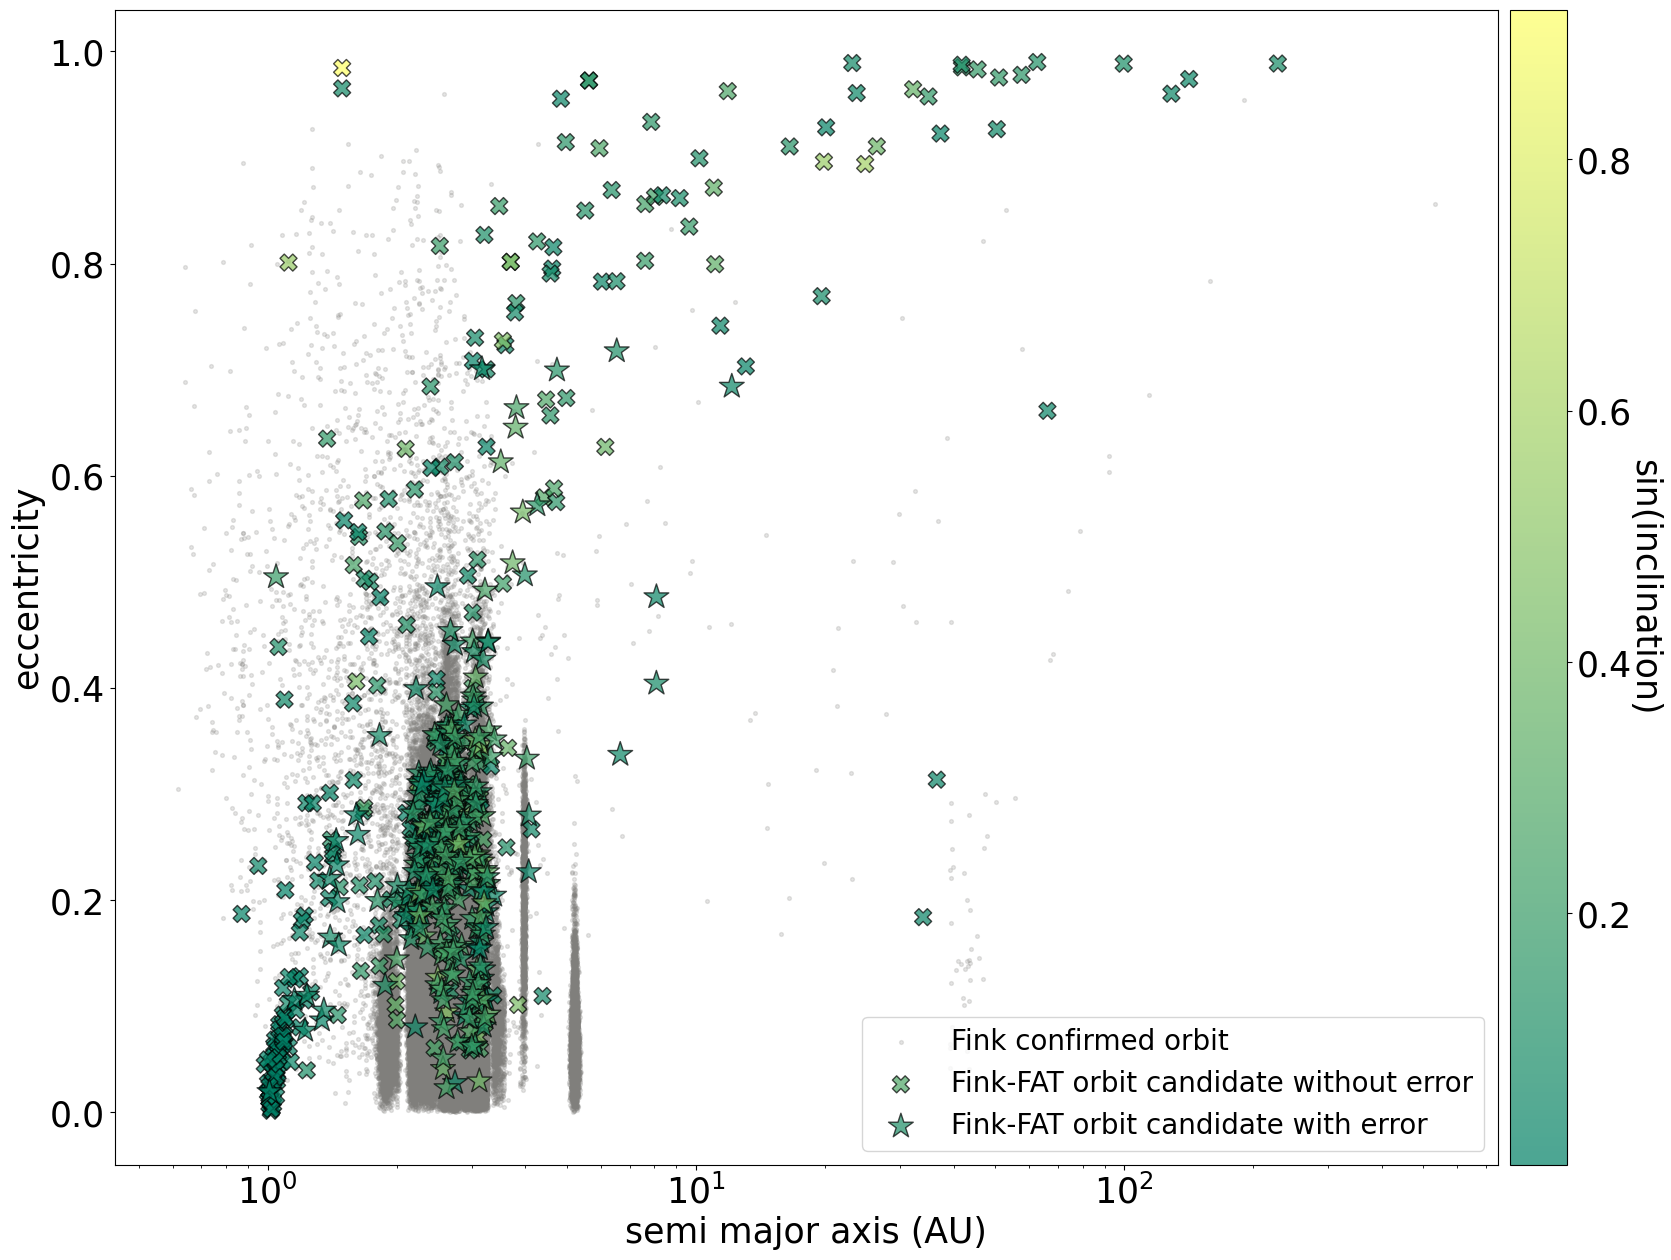

In [13]:
candid_reconstr_orbit["d:sin_i"] = np.sin(np.deg2rad(candid_reconstr_orbit["d:i"]))


incl = candid_reconstr_orbit["d:sin_i"]
min_, max_ = incl.min(), incl.max()

fig = plt.figure(figsize=(30, 15))

cm = plt.cm.get_cmap('summer')

ax = plt.gca()
ax.set_xscale("log")

#sns.kdeplot(data=main_belt, x="a", y="e", thresh=0.5, alpha=0.6, cbar=False, ax=ax, label="MBA")
#sns.kdeplot(data=aten, x="a", y="e", thresh=0.5, alpha=0.6, cbar=False, ax=ax, label="Aten")

plt.scatter(
    mpc_in_fink["a"], 
    mpc_in_fink["e"], 
    c="#807f7c", 
    s=30,
    marker=".",
    alpha=0.2, 
    label="Fink confirmed orbit"
)

with_error = candid_reconstr_orbit[candid_reconstr_orbit["has_error"]]
without_error = candid_reconstr_orbit[~candid_reconstr_orbit["has_error"]]

sc = plt.scatter(
    without_error["d:a"], 
    without_error["d:e"], 
    c=without_error["d:sin_i"],
    edgecolors='black',
    s=150,
    cmap=cm,
    marker="X",
    label="Fink-FAT orbit candidate without error",
    alpha=0.7
)
plt.clim(min_, max_)


sc = plt.scatter(
    with_error["d:a"], 
    with_error["d:e"], 
    c=with_error["d:sin_i"],
    edgecolors='black',
    marker="*",
    s=350,
    cmap=cm, 
    label="Fink-FAT orbit candidate with error",
    alpha=0.7
)
plt.clim(min_, max_)


cbar = sc.figure.colorbar(sc, fraction=0.4, pad=0.005)

cbar.set_label("sin(inclination)", rotation=270, fontsize=25, labelpad=21)
cbar.ax.tick_params(labelsize=25)

ax.tick_params(axis="x", which="major", labelsize=25)
ax.tick_params(axis="y", which="major", labelsize=25)
ax.set_xlabel("semi major axis (AU)", fontsize=25)
ax.set_ylabel("eccentricity", fontsize=25)

ax.legend(prop={"size": 20})
plt.show()

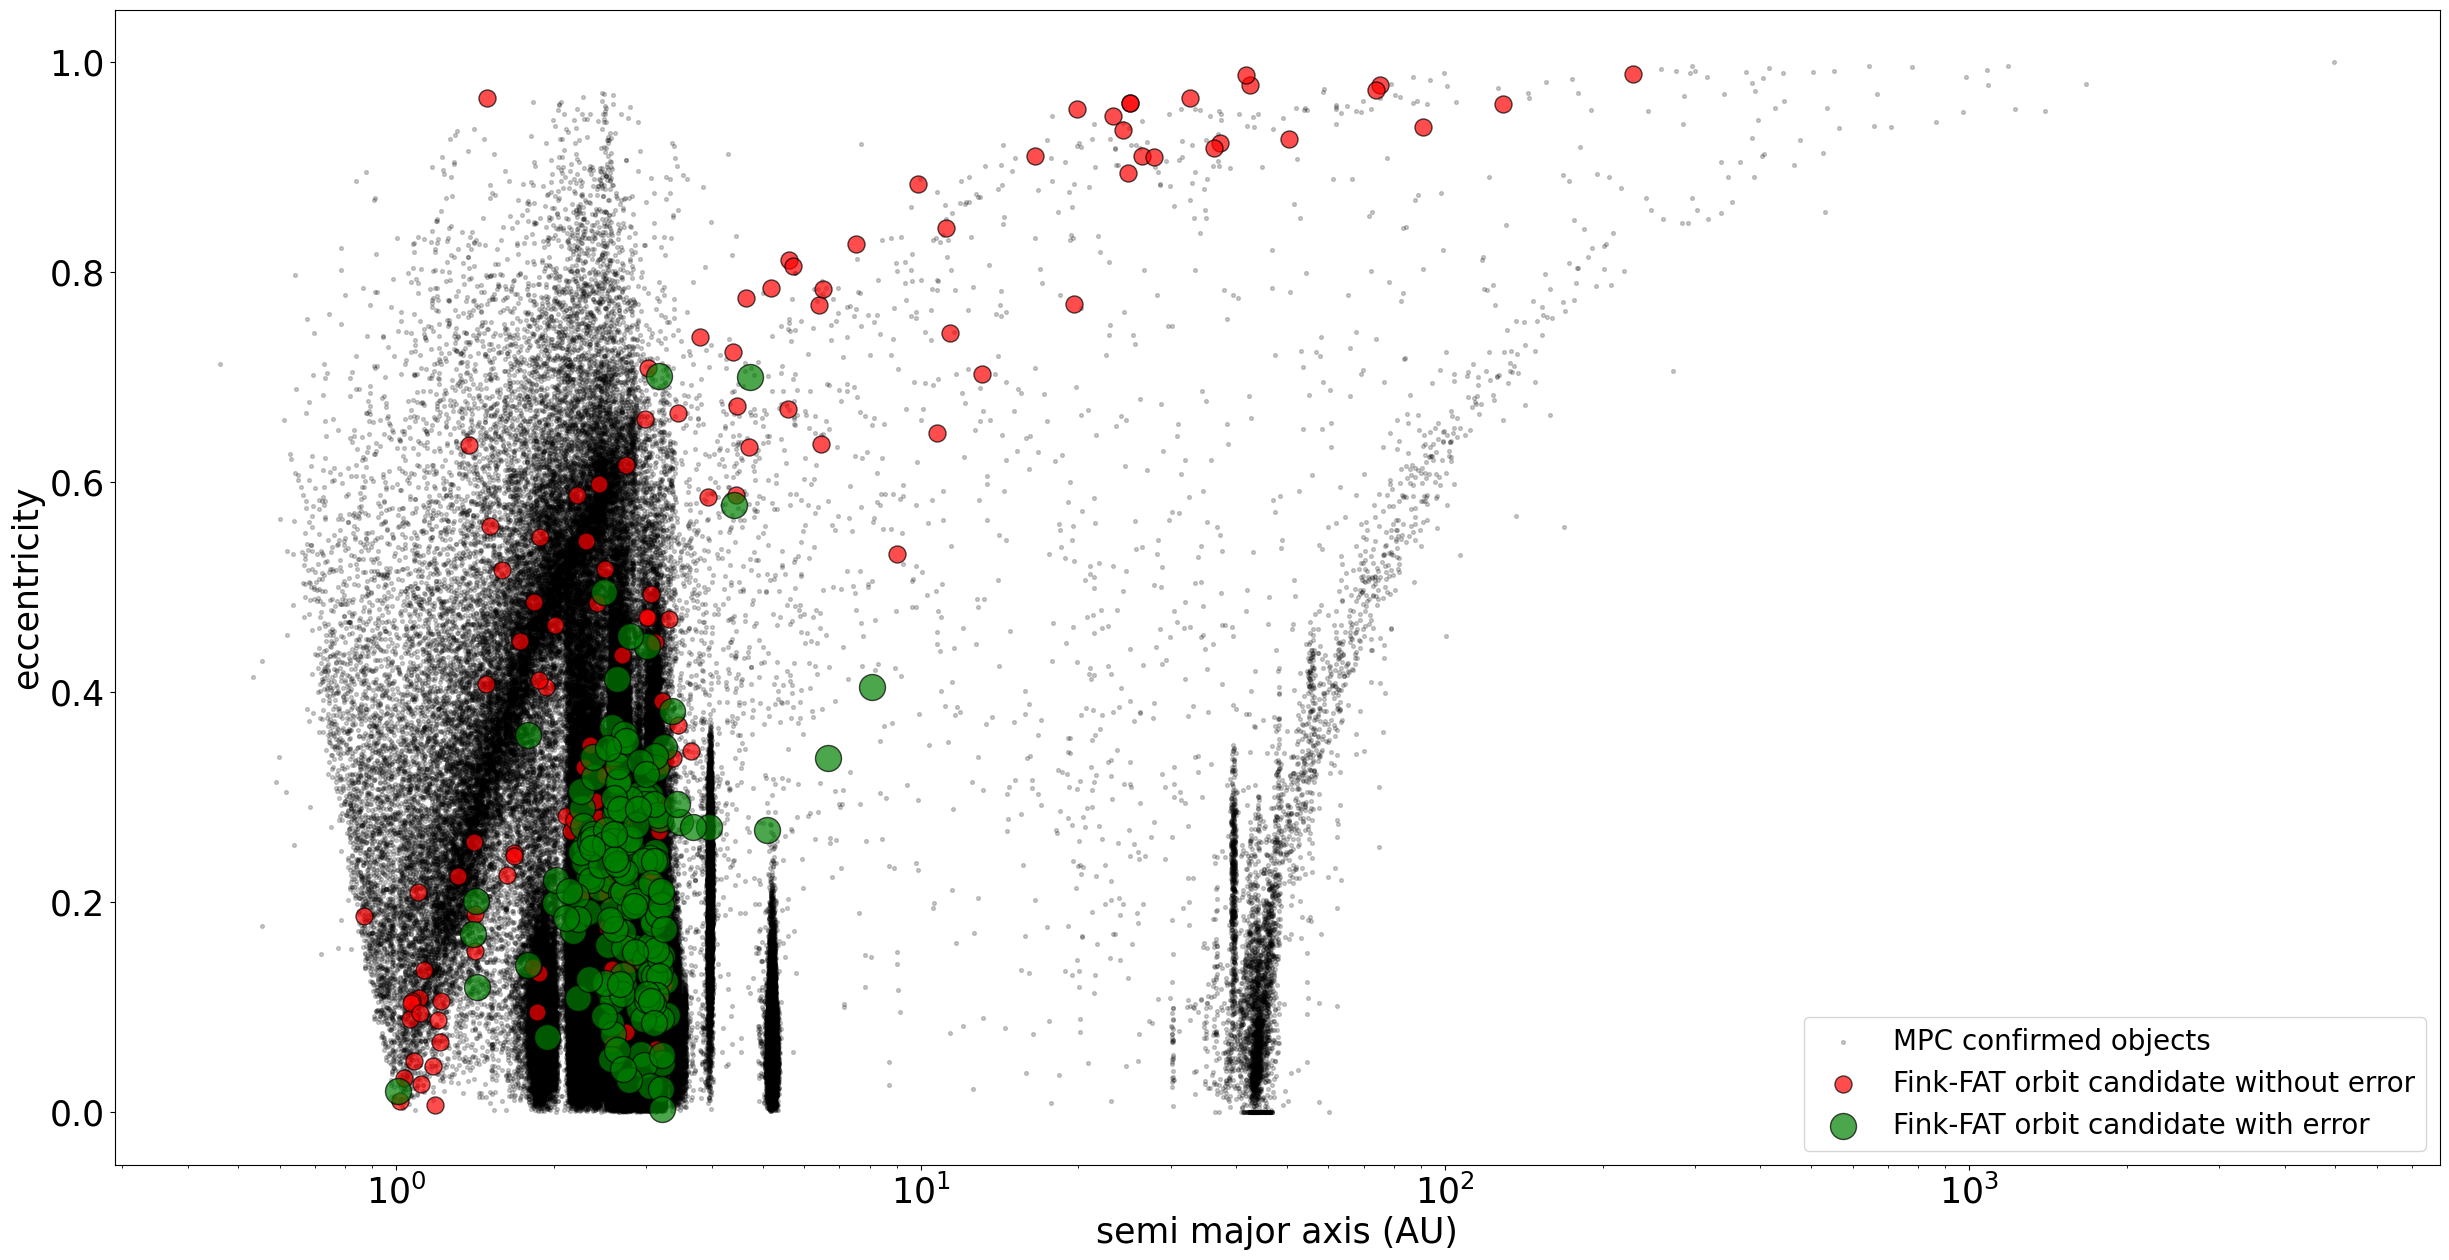

In [20]:
fig = plt.figure(figsize=(30, 15))
ax = plt.gca()


plt.scatter(
    mpc_ast_data["a"], 
    mpc_ast_data["e"], 
    c="#000000", 
    s=30,
    marker=".",
    alpha=0.2, 
    label="MPC confirmed objects"
)

plt.xscale("log")


with_error = candid_reconstr_orbit[candid_reconstr_orbit["has_error"]]
without_error = candid_reconstr_orbit[~candid_reconstr_orbit["has_error"]]

error = with_error["d:rms_a"]

sc = plt.scatter(
    without_error["d:a"], 
    without_error["d:e"],
    edgecolors='black',
    s=150,
    marker="o",
    c="red",
    label="Fink-FAT orbit candidate without error",
    alpha=0.7
)

sc = plt.scatter(
    with_error["d:a"], 
    with_error["d:e"],
    edgecolors='black',
    marker="o",
    s=350,
    c="green",
    label="Fink-FAT orbit candidate with error",
    alpha=0.7
)


ax.tick_params(axis="x", which="major", labelsize=25)
ax.tick_params(axis="y", which="major", labelsize=25)
ax.set_xlabel("semi major axis (AU)", fontsize=25)
ax.set_ylabel("eccentricity", fontsize=25)

ax.legend(prop={"size": 20})

plt.show()

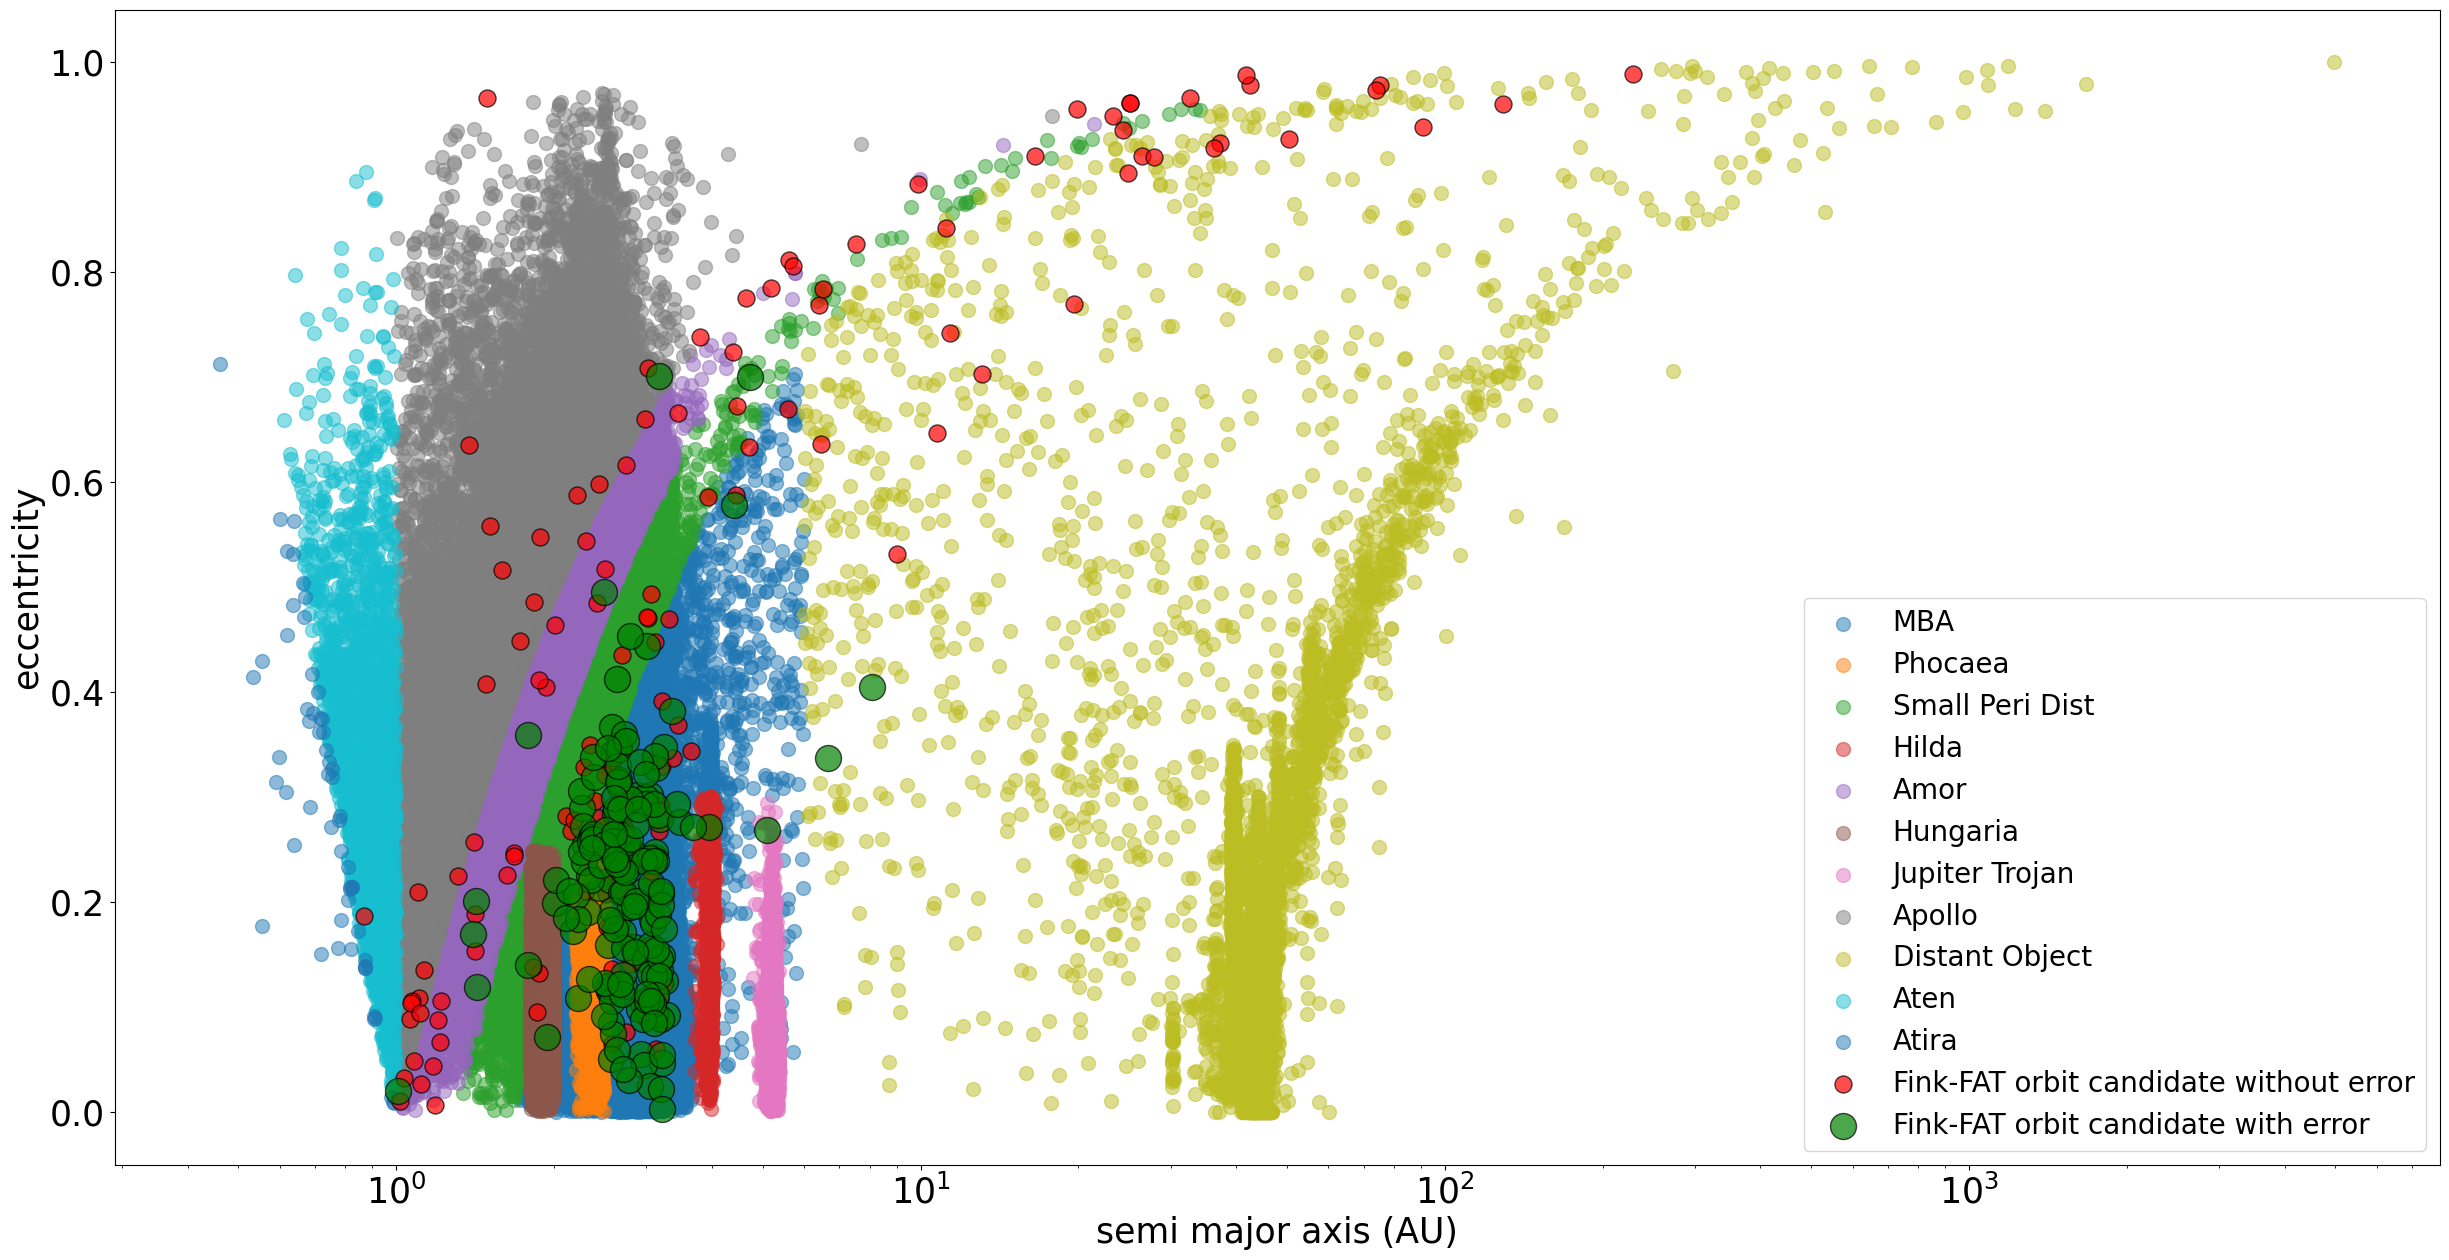

In [30]:
fig = plt.figure(figsize=(30, 15))
ax = plt.gca()

for orb in mpc_in_fink["Orbit_type"].unique():
    cur_orb = mpc_ast_data[mpc_ast_data["Orbit_type"] == orb]
    if orb == "Object with perihelion distance < 1.665 AU":
        orb = "Small Peri Dist"

    ax.scatter(cur_orb["a"], cur_orb["e"], label=orb, alpha=0.5, s=100)

plt.xscale("log")


with_error = candid_reconstr_orbit[candid_reconstr_orbit["has_error"]]
without_error = candid_reconstr_orbit[~candid_reconstr_orbit["has_error"]]


sc = plt.scatter(
    without_error["d:a"], 
    without_error["d:e"],
    edgecolors='black',
    s=150,
    marker="o",
    c="red",
    label="Fink-FAT orbit candidate without error",
    alpha=0.7
)

sc = plt.scatter(
    with_error["d:a"], 
    with_error["d:e"],
    edgecolors='black',
    marker="o",
    s=350,
    c="green",
    label="Fink-FAT orbit candidate with error",
    alpha=0.7
)


ax.tick_params(axis="x", which="major", labelsize=25)
ax.tick_params(axis="y", which="major", labelsize=25)
ax.set_xlabel("semi major axis (AU)", fontsize=25)
ax.set_ylabel("eccentricity", fontsize=25)

ax.legend(prop={"size": 20})

plt.show()